# Behavioral result

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
sns.set_theme(style="darkgrid")

Participants: 203 (9)
Adults: 61
Juveniles: 142


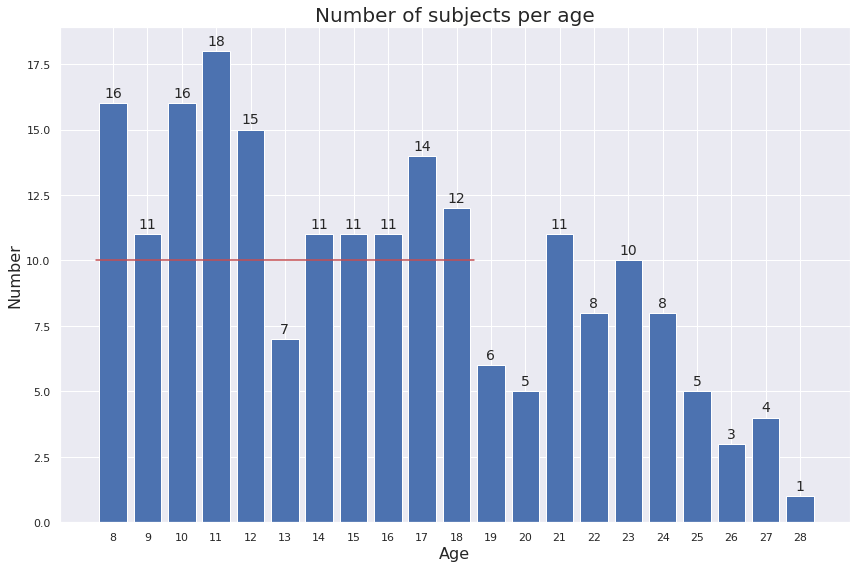

In [130]:
participants_file = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(participants_file,sep='\t')
data = data[data['game1_fmri']>=0.5]
print("Participants:", len(data),f"({len(data[data['game1_fmri']==0.5])})")
print("Adults:", len(data.query("Age>18")))
print("Juveniles:", len(data.query("Age<=18")))

# extract subject's number in each group
ages = []
nums = []
for subs in data.groupby('Age'):
    ages.append(subs[0])
    nums.append(len(subs[1]))

# plot bar chart of subject's number with labels
fig,ax = plt.subplots(figsize=(12,8))
ax.plot([7.5,18.5],[10,10],color='r')
rects = ax.bar(ages,nums,color='b')

# add some text for labels, title and custom x-axis tick labels, etc
ax.set_xlabel("Age",size=16)
ax.set_ylabel("Number",size=16)
ax.set_xticks(range(8,29))
ax.set_title("Number of subjects per age",size=20)
ax.bar_label(rects,padding=3,size=14)

fig.tight_layout()
savepath = r'/mnt/workdir/DCM/result/behaviour/subjects-game1.png'
plt.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)
plt.show()

## Training performance

142


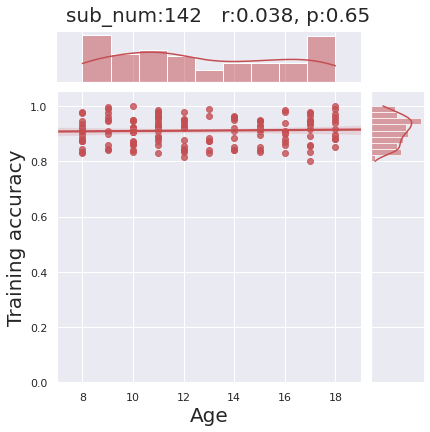

In [16]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]
data = data[data['Age']<=18]
print(len(data))
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
# correlation
res = pearsonr(data['Age'],data['training_acc'])
r = res[0]
p = res[1]

# plot
g = sns.jointplot(x="Age", y="training_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 19), ylim=(0, 1.05),
                  color="r", height=6,order=1)
#move overall title up
g.set_axis_labels('Age', 'Training accuracy',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('sub_num:{}   r:{}  p<0.001'.format(len(data),round(r,3)))
else:
    g.fig.suptitle('sub_num:{}   r:{}, p:{}'.format(len(data),round(r,3),round(p,3)),size=20)

savepath = r'/mnt/workdir/DCM/result/behaviour/age-training.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

# Group difference between adults and Juveniles

Mean training accuracy of adults: 0.9339344262295083
Mean traning accuracy of juveniles: 0.911021126760563
3.1577088510187554 0.0018350653664641434


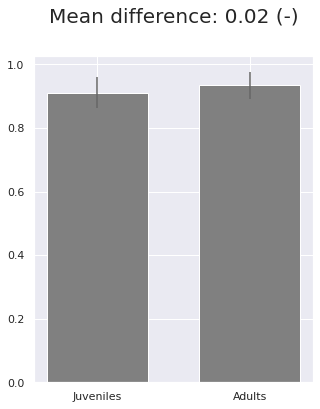

In [129]:
from scipy.stats import ttest_ind
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
adults_acc = data[data['Age']>18]['training_acc']
juveniles_acc = data[data['Age']<=18]['training_acc']

print('Mean training accuracy of adults:',adults_acc.mean())
print("Mean traning accuracy of juveniles:",juveniles_acc.mean())
r,p = ttest_ind(adults_acc,juveniles_acc)
print(r,p)

# Calculate the mean and standard deviation of each group
adults_mean, adults_std = np.mean(adults_acc), np.std(adults_acc)
children_mean, children_std = np.mean(juveniles_acc), np.std(juveniles_acc)

# Calculate the difference between the means
mean_diff = adults_mean - children_mean

# Set the bar plot parameters
bar_width = 0.2
error_config = {'ecolor': '0.4'}

# Plot the bar plot
fig, ax = plt.subplots(figsize=(5,6))
children_bar = ax.bar(0.1, children_mean, bar_width, color= 'grey',yerr=children_std, error_kw=error_config, label='Juveniles',align='center')
adults_bar = ax.bar(0.4, adults_mean, bar_width, color= 'grey',yerr=adults_std, error_kw=error_config, label='Adults',align='center')
ax.set_xticks([0.1, 0.4])
ax.set_xticklabels(['Juveniles','Adults'])

# Add the sign of the difference to the plot
if mean_diff > 0:
    sign = '-'
else:
    sign = '+'
ax.text(0.25, max(adults_mean, children_mean)+0.2, 'Mean difference: {:.2f} ({})'.format(abs(mean_diff), sign), ha='center',fontsize=20)
plt.show()


## Age - 1D Inference

203


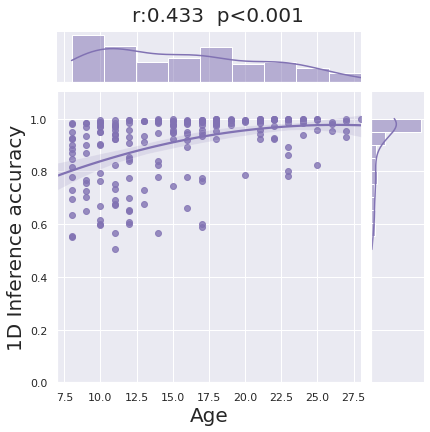

In [23]:
beha_total_score = r'//mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]
print(len(data))
res = pearsonr(data['Age'],data['1D_acc'])
r = res[0]
p = res[1]

# plot
g = sns.jointplot(x="Age", y="1D_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 28), ylim=(0.3, 1.1),
                  color="m", height=6,order=2)

#move overall title up
g.set_axis_labels('Age', '1D Inference accuracy',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)),size=20)
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)),size=20)

savepath = r'/mnt/workdir/DCM/result/behaviour/age-1Dtask.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

## Age - 2D Inference game1

203


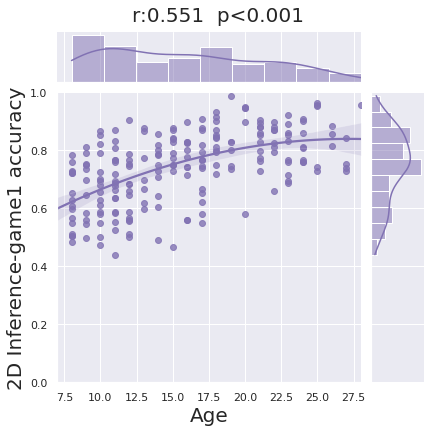

In [21]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]

print(len(data))
res = pearsonr(data['Age'],data['game1_acc'])
r = res[0]
p = res[1]

# plot
g = sns.jointplot(x="Age", y="game1_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 28), ylim=(0.3, 1),
                  color="m", height=6,order=1)

#move overall title up
g.set_axis_labels('Age', '2D Inference-game1 accuracy',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)),size=20)
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)),size=20)

savepath = r'/mnt/workdir/DCM/result/behaviour/age-2Dgame1.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

In [133]:
import numpy as np
from scipy.interpolate import make_interp_spline
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2

data = data[data['game1_fmri']>=0.5]
ages = []
train_accs = []
game1_accs = []
game2_accs = []
for sub in data.itertuples():
    ages.append(sub.Age)
    train_accs.append(sub.training_acc)
    game1_accs.append(sub.game1_acc)
    game2_accs.append(sub.game2_test_acc)

fig,ax = plt.subplots(1,1,figsize=(12,10))
sns.lineplot(x=ages,y=train_accs,linewidth=4,label='Pairwise memory')
sns.lineplot(x=ages,y=game1_accs,linewidth=4,label='2D Inference')
plt.legend(fontsize=15)
plt.xlabel("Age",size=20)
plt.ylabel("Acuuracy",size=20)
savepath = r'/mnt/workdir/DCM/result/behaviour/age-2dacc-curve.png'
plt.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

TypeError: tuple indices must be integers or slices, not str

### Partial correlation: Age - 2D Inference game1 by controling training performance

In [43]:
import pingouin as pg

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
pg.partial_corr(data=data, x='Age', y='game1_acc', covar=['training_acc'])

,n,r,CI95%,p-val
pearson,203,0.541804,"[0.44, 0.63]",8.319323e-17


In [68]:
import pandas as pd
import statsmodels.api as sm

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2

print(len(data))
X = data[['Age','training_acc','1D_acc']]
Y = data['game1_acc']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
print(model_summary)

203
                            OLS Regression Results                            
Dep. Variable:              game1_acc   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     182.4
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           7.55e-57
Time:                        19:24:45   Log-Likelihood:                 271.37
No. Observations:                 203   AIC:                            -534.7
Df Residuals:                     199   BIC:                            -521.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3608      0.086     -4.20

# Game2

#### Subject information

Participants: 193 (8)
Adults: 60
Juveniles: 133


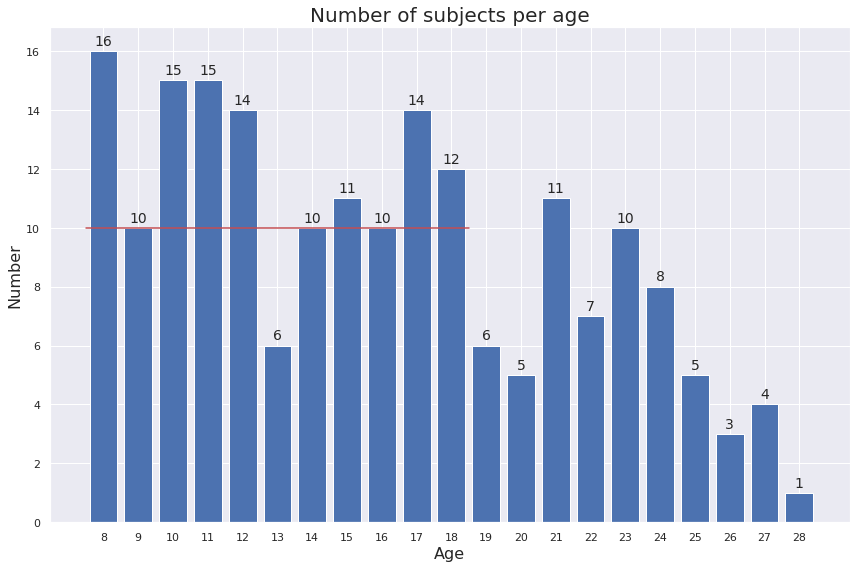

In [131]:
participants_file = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(participants_file,sep='\t')
data = data[data['game2_fmri']>=0.5]
print("Participants:", len(data),f"({len(data[data['game2_fmri']==0.5])})")
print("Adults:", len(data.query("Age>18")))
print("Juveniles:", len(data.query("Age<=18")))

# extract subject's number in each group
ages = []
nums = []
for subs in data.groupby('Age'):
    ages.append(subs[0])
    nums.append(len(subs[1]))

# plot bar chart of subject's number with labels
fig,ax = plt.subplots(figsize=(12,8))
ax.plot([7.5,18.5],[10,10],color='r')
rects = ax.bar(ages,nums,color='b')

# add some text for labels, title and custom x-axis tick labels, etc
ax.set_xlabel("Age",size=16)
ax.set_ylabel("Number",size=16)
ax.set_xticks(range(8,29))
ax.set_title("Number of subjects per age",size=20)
ax.bar_label(rects,padding=3,size=14)

fig.tight_layout()
savepath = r'/mnt/workdir/DCM/result/behaviour/subjects-game2.png'
plt.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)
plt.show()

### Age - game2

193


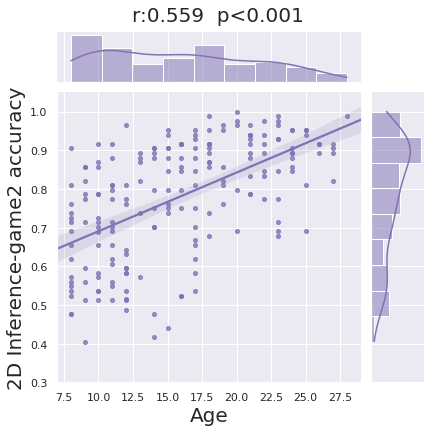

In [53]:
#age-game2
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data.query('game2_fmri>=0.5')

print(len(data))
# cal correlation
res = pearsonr(data['Age'],data['game2_test_acc'])
r = res[0]
p = res[1]
# plot
g = sns.jointplot(x="Age", y="game2_test_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 29), ylim=(0.3, 1.05),
                  color="m", height=6,order=1,scatter_kws={'s':16,'alpha':0.8})
#move overall title up
g.set_axis_labels('Age', '2D Inference-game2 accuracy',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)),size=20)
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)),size=20)

savepath = r'/mnt/workdir/DCM/result/behaviour/age-2Dgame2test.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

193


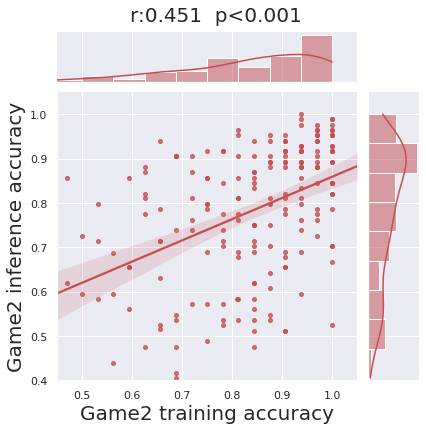

In [136]:
#age-game2
beha_total_score = r'//mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data.query('game2_fmri>=0.5')
game2_train_ap =  data['game2_train_ap'].to_list()
game2_train_ap = [float(p) for p in game2_train_ap]
data['game2_train_ap'] = game2_train_ap
data['game2_training_acc'] = (data['game2_train_ap'] + data['game2_train_ap'])/2
print(len(data))
# cal correlation
res = pearsonr(data['game2_training_acc'],data['game2_test_acc'])
r = res[0]
p = res[1]
# plot
g = sns.jointplot(x="game2_training_acc", y="game2_test_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(0.45, 1.05), ylim=(0.4, 1.05),
                  color="r", height=6,scatter_kws={'s':16,'alpha':0.8})
#move overall title up
g.set_axis_labels('Game2 training accuracy', 'Game2 inference accuracy',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)),size=20)
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)),size=20)

savepath = r'/mnt/workdir/DCM/result/behaviour/game2trian-game2test.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

In [62]:
import pingouin as pg

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game2_fmri']>=0.5]
game2_train_ap =  data['game2_train_ap'].to_list()
game2_train_ap = [float(p) for p in game2_train_ap]
data['game2_train_ap'] = game2_train_ap
data['game2_training_acc'] = (data['game2_train_ap'] + data['game2_train_ap'])/2
pg.partial_corr(data=data, x='Age', y='game2_test_acc', covar=['game2_training_acc'])

,n,r,CI95%,p-val
pearson,193,0.41788,"[0.29, 0.53]",1.632154e-09


###  Age -  correlation between game1 and game2

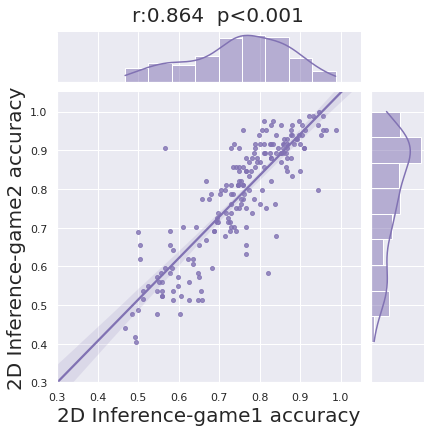

In [67]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data.query('game2_fmri>=0.5')

# plot
g = sns.jointplot(x="game1_acc", y="game2_test_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(0.3, 1.05), ylim=(0.3, 1.05),scatter_kws={'s':16,'alpha':0.8},
                  color="m", height=6)

res = pearsonr(data['game1_acc'],data['game2_test_acc'])
r = res[0]
p = res[1]

#move overall title up
g.set_axis_labels('2D Inference-game1 accuracy', '2D Inference-game2 accuracy',size=20)
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('r:{}  p:{}'.format(r,p))
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)),size=20)
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)),size=20)

savepath = r'/mnt/workdir/DCM/result/behaviour/game1-game2.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

## game2 GLM

In [82]:
import pandas as pd
import statsmodels.api as sm

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game2_fmri']>=0.5]
game2_train_ap =  data['game2_train_ap'].to_list()
game2_train_ap = [float(p) for p in game2_train_ap]
data['game2_train_ap'] = game2_train_ap
data['game2_training_acc'] = (data['game2_train_ap'] + data['game2_train_ap'])/2
print(len(data))
X = data[['Age','game2_training_acc','game1_acc']]
Y = data['game2_test_acc']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
print(model_summary)

193
                            OLS Regression Results                            
Dep. Variable:         game2_test_acc   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     198.8
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           3.38e-58
Time:                        19:35:21   Log-Likelihood:                 231.26
No. Observations:                 193   AIC:                            -454.5
Df Residuals:                     189   BIC:                            -441.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0319   